In [1]:
import copy
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

RDKit WARNING: [22:16:57] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
mol1 = Chem.MolFromSmiles("C1CCNCC1")
mol2 = Chem.MolFromSmiles("c1ccccc1")
mol3 = Chem.MolFromSmiles("C1CC1CC")
mol4 = Chem.MolFromSmiles("C1CC1CCC2CCOC2")
mol5 = Chem.MolFromSmiles("C1CCC2CCCCC2C1")
mol6 = Chem.MolFromSmiles("OC1CC2(C1)CCCC2")
mol7 = Chem.MolFromSmiles("CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N")
mol8 = Chem.MolFromSmiles("c1ccccc1c2ccccc2OC")
mol9 = Chem.MolFromSmiles("CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5")
mol10 = Chem.MolFromSmiles("C1CCCC1CCCOCOCOCOCOCc1ccccc1")
mols = [mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10]

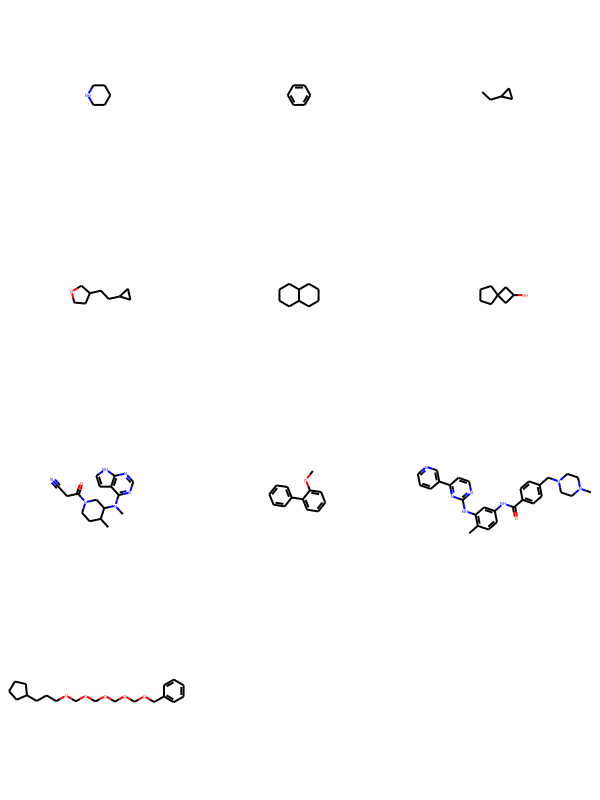

In [3]:
Draw.MolsToGridImage(mols, molsPerRow=3)

In [4]:
def is_in_samering(idx1, idx2, bond_rings):
    for bond_ring in bond_rings:
        if idx1 in bond_ring and idx2 in bond_ring:
            return True
    return False

In [5]:
def getLinkerbond(mol, useScaffold=True):
    res = []
    for atom in mol.GetAtoms():
        atom.SetIntProp("orig_idx", atom.GetIdx())
    for bond in mol.GetBonds():
        bond.SetIntProp("orig_idx", bond.GetIdx())
    
    if useScaffold:
        mol = MurckoScaffold.GetScaffoldForMol(mol)
        
    ring_info = mol.GetRingInfo()
    bond_rings = ring_info.BondRings()
    ring_bonds = set()
    for ring_bond_idxs in bond_rings:
        for idx in ring_bond_idxs:
            ring_bonds.add(idx)
    all_bonds_idx = [bond.GetIdx() for bond in mol.GetBonds()]
    none_ring_bonds = set(all_bonds_idx) - ring_bonds
    for bond_idx in none_ring_bonds:
        bgn_idx = mol.GetBondWithIdx(bond_idx).GetBeginAtomIdx()
        end_idx = mol.GetBondWithIdx(bond_idx).GetEndAtomIdx()
        if mol.GetBondWithIdx(bond_idx).GetBondTypeAsDouble() == 1.0:
            if mol.GetAtomWithIdx(bgn_idx).IsInRing()+mol.GetAtomWithIdx(end_idx).IsInRing() == 1:
                bond = mol.GetBondWithIdx(bond_idx)
                orig_idx = bond.GetIntProp("orig_idx")
                res.append(orig_idx)
            elif not is_in_samering(bgn_idx, end_idx, bond_rings) and mol.GetAtomWithIdx(bgn_idx).IsInRing()+mol.GetAtomWithIdx(end_idx).IsInRing() == 2:
                bond = mol.GetBondWithIdx(bond_idx)
                orig_idx = bond.GetIntProp("orig_idx")
                res.append(orig_idx)
    return res

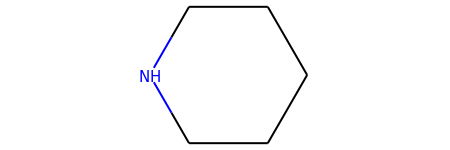

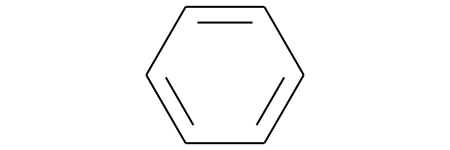

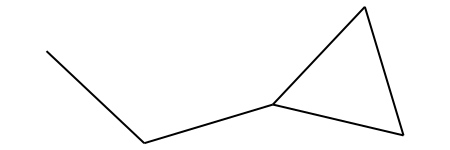

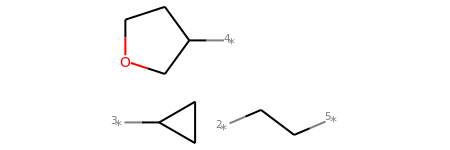

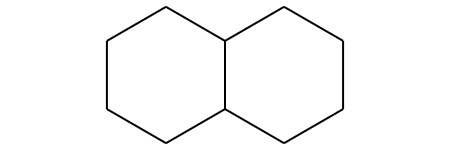

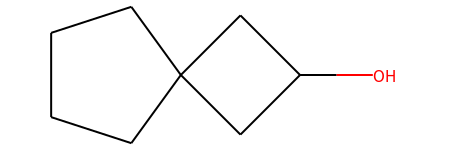

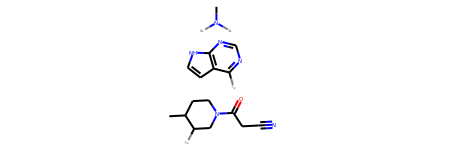

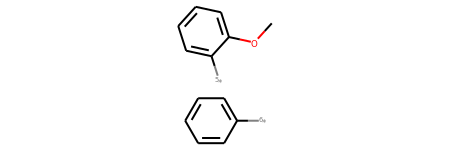

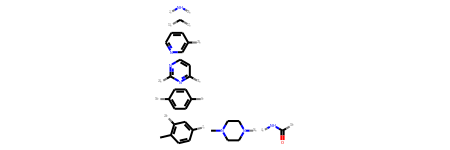

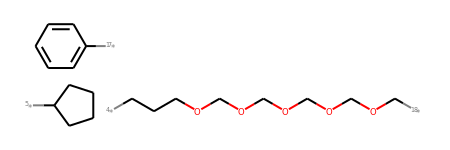

In [6]:
for mol in mols:
    bonds = getLinkerbond(mol)
    if bonds:
        res = Chem.FragmentOnBonds(mol, bonds)
        display(res)
    else:
        display(mol)

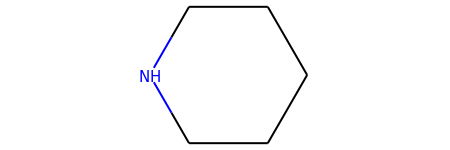

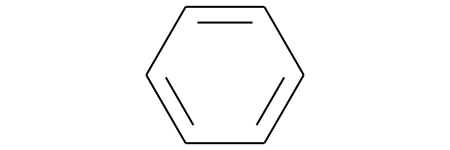

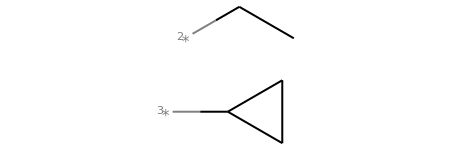

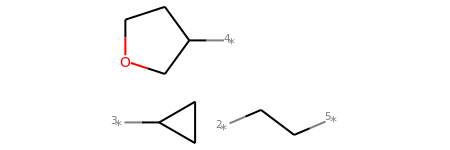

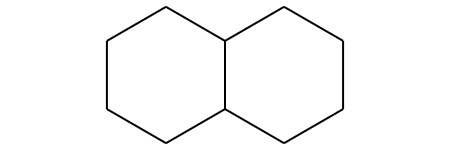

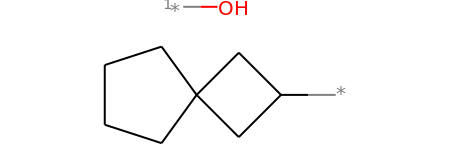

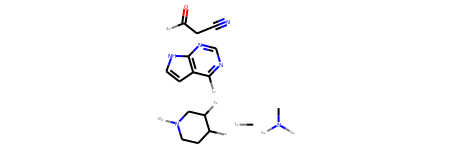

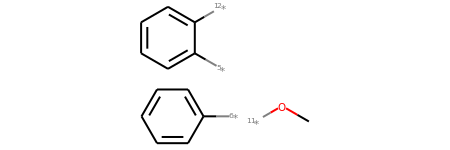

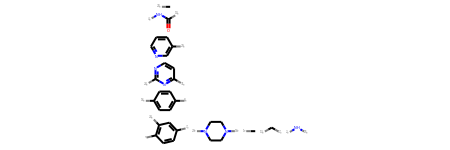

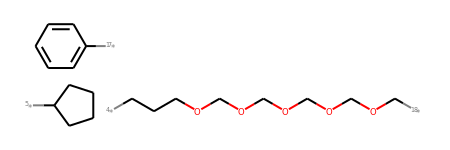

In [7]:
for mol in mols:
    bonds = getLinkerbond(mol, False)
    if bonds:
        res = Chem.FragmentOnBonds(mol, bonds)
        display(res)
    else:
        display(mol)

In [8]:
frgs = Chem.GetMolFrags(res, asMols=True)

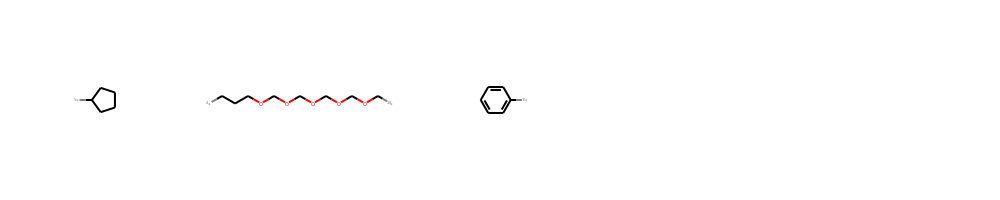

In [9]:
Draw.MolsToGridImage(frgs, molsPerRow=5)